In [1]:
# HYPERPARAMETERS
model_name = "I5-R5"

In [2]:
# GET DATA
from traning_classes import DataManager

dm = DataManager()
image_dir = f"../_images/{model_name}/traning"
dm.load_images(image_dir)
X_train, X_test, y_train, y_test = dm.split_data()

KeyboardInterrupt: 

In [ ]:
# GET MODEL ARCHITECTURE
from model_architectures import *

if model_name.startswith("I5"):
    model = I5_architecture()
elif model_name.startswith("I20"):
    model = I20_architecture()
elif model_name.startswith("I60"):
    model = I60_architecture()
else:
    raise ValueError("Model name not recognized")

model.summary()

In [ ]:
 # TRAINING
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=10,
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=1,
    min_lr=1e-6
)
callbacks = [early_stopping, reduce_lr]

history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=128,
    epochs=40,
    validation_split=0.3,
    callbacks=callbacks
).history

2025-08-12 15:49:45.177634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


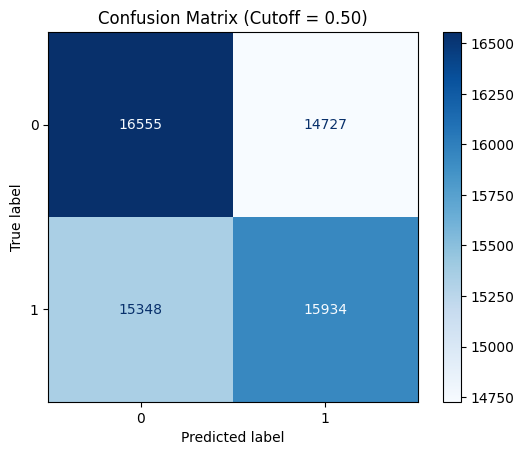

{'accuracy': 0.5192922447413848, 'precision': 0.5196829848993836, 'recall': 0.5093664087973915, 'f1': 0.5144729832265147}


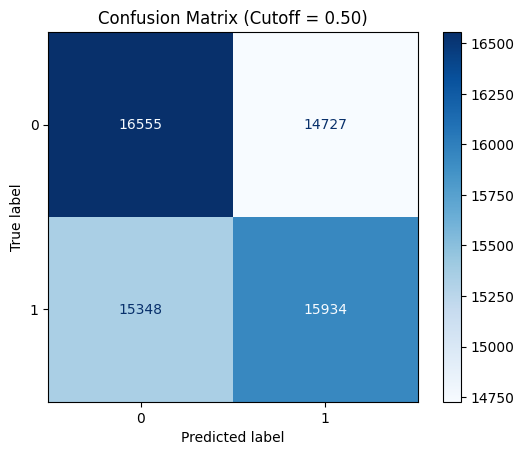

✅ Model report saved as 'performance_reports/I5-R5_report.pdf'


In [4]:
# EVALUATE PERFORMANCE
from traning_classes import ModelPerformanceIndicators as MPI

test_predictions = model.predict(X_test, verbose=0)

error_matrix = MPI.compute_error_matrix(test_predictions, y_test)

metrics = MPI.compute_basic_metrics(test_predictions, y_test)
print(metrics)

MPI.save_pdf(test_predictions, y_test, model_name)

In [ ]:
# SAVE MODEL
model_filename = '../models/I5-R5.keras'
model.save(model_filename)